In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

### Dataset: The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable.

In [2]:
df = pd.read_csv(r"C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Trimester-4\Machine Learning\Labs\Lab3\heart_2020.csv",  encoding = "latin")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


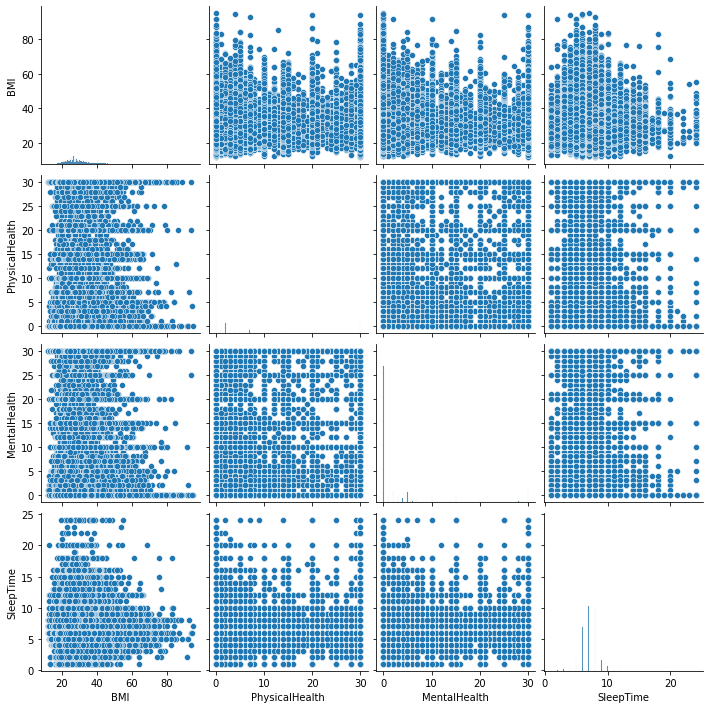

In [7]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

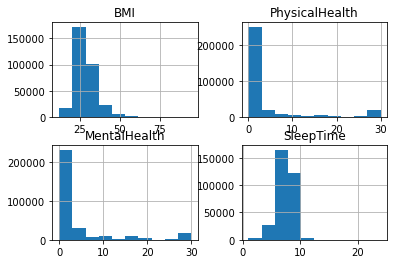

In [8]:
df.hist()

In [9]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [10]:
df.Diabetic.replace(['No, borderline diabetes', 'No' , 'Yes','Yes (during pregnancy)'], [0,0,1,1], inplace=True)

In [11]:
df.Diabetic.value_counts()

0    276434
1     43361
Name: Diabetic, dtype: int64

In [12]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,Diabetic,SleepTime
BMI,1.000000,0.109788,0.064131,0.200443,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,0.153975,-0.061387
MentalHealth,0.064131,0.287987,1.000000,0.029709,-0.119717
Diabetic,0.200443,0.153975,0.029709,1.000000,0.003452
SleepTime,-0.051822,-0.061387,-0.119717,0.003452,1.000000


In [13]:
# We can see that BMI and Diabetes are correlated i.e. when BMI increases so does the diabetes in a person.

In [14]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,1,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,0,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,1,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,0,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,0,Yes,Very good,8.0,No,No,No


In [15]:
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity" , "Asthma" , "KidneyDisease" , "SkinCancer"]

In [16]:
df[column_yesno] = df[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [17]:
categoricals = df.select_dtypes(include=['object'])
categoricals.head()

,Sex,AgeCategory,Race,GenHealth
0,Female,55-59,White,Very good
1,Female,80 or older,White,Very good
2,Male,65-69,White,Fair
3,Female,75-79,White,Good
4,Female,40-44,White,Very good


In [18]:
cat_dummies = pd.get_dummies(categoricals, drop_first=True)
cat_dummies.head()

,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df.drop(list(categoricals.columns), axis=1, inplace=True)

In [20]:
df.shape

(319795, 14)

In [21]:
# concating df and dummies data frames.
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [22]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.174782,-0.100030,...,0.143041,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,0.147954,0.039033,0.174662,-0.101886
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.200443,-0.150616,...,-0.094780,-0.078643,0.080672,0.023750,0.012535,-0.049060,0.127364,0.118047,0.062501,-0.065954
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.055544,-0.097174,...,0.013569,-0.060308,-0.038249,-0.066873,0.016205,0.072367,0.095620,0.059651,0.086520,-0.052305
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.057786,0.017487,...,-0.045226,-0.022275,-0.025980,-0.015554,0.005455,0.033342,-0.018859,-0.007808,-0.017068,0.013005
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.104467,-0.079455,...,0.086099,-0.016060,0.024819,-0.025823,0.005743,0.001154,0.104983,0.013159,0.133641,-0.069395
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.153975,-0.232283,...,0.039621,-0.035229,0.011371,-0.005571,0.016102,-0.003968,0.303773,-0.037663,0.471919,-0.196462
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.029709,-0.095808,...,-0.071718,-0.023113,0.010944,0.011167,0.031385,-0.024489,0.151321,0.013353,0.192079,-0.089956
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.209255,-0.278524,...,0.156933,-0.038830,0.039615,-0.008214,0.008483,-0.015516,0.282517,0.031570,0.308767,-0.184986
Diabetic,0.174782,0.200443,0.055544,-0.057786,0.104467,0.153975,0.029709,0.209255,1.000000,-0.136599,...,0.043523,-0.012519,0.053722,0.007259,0.006349,-0.043658,0.175585,0.081214,0.135337,-0.116189
PhysicalActivity,-0.100030,-0.150616,-0.097174,0.017487,-0.079455,-0.232283,-0.095808,-0.278524,-0.136599,1.000000,...,-0.092533,0.012106,-0.043701,-0.056564,0.001808,0.064172,-0.174255,-0.072263,-0.174144,0.132472


<AxesSubplot:>

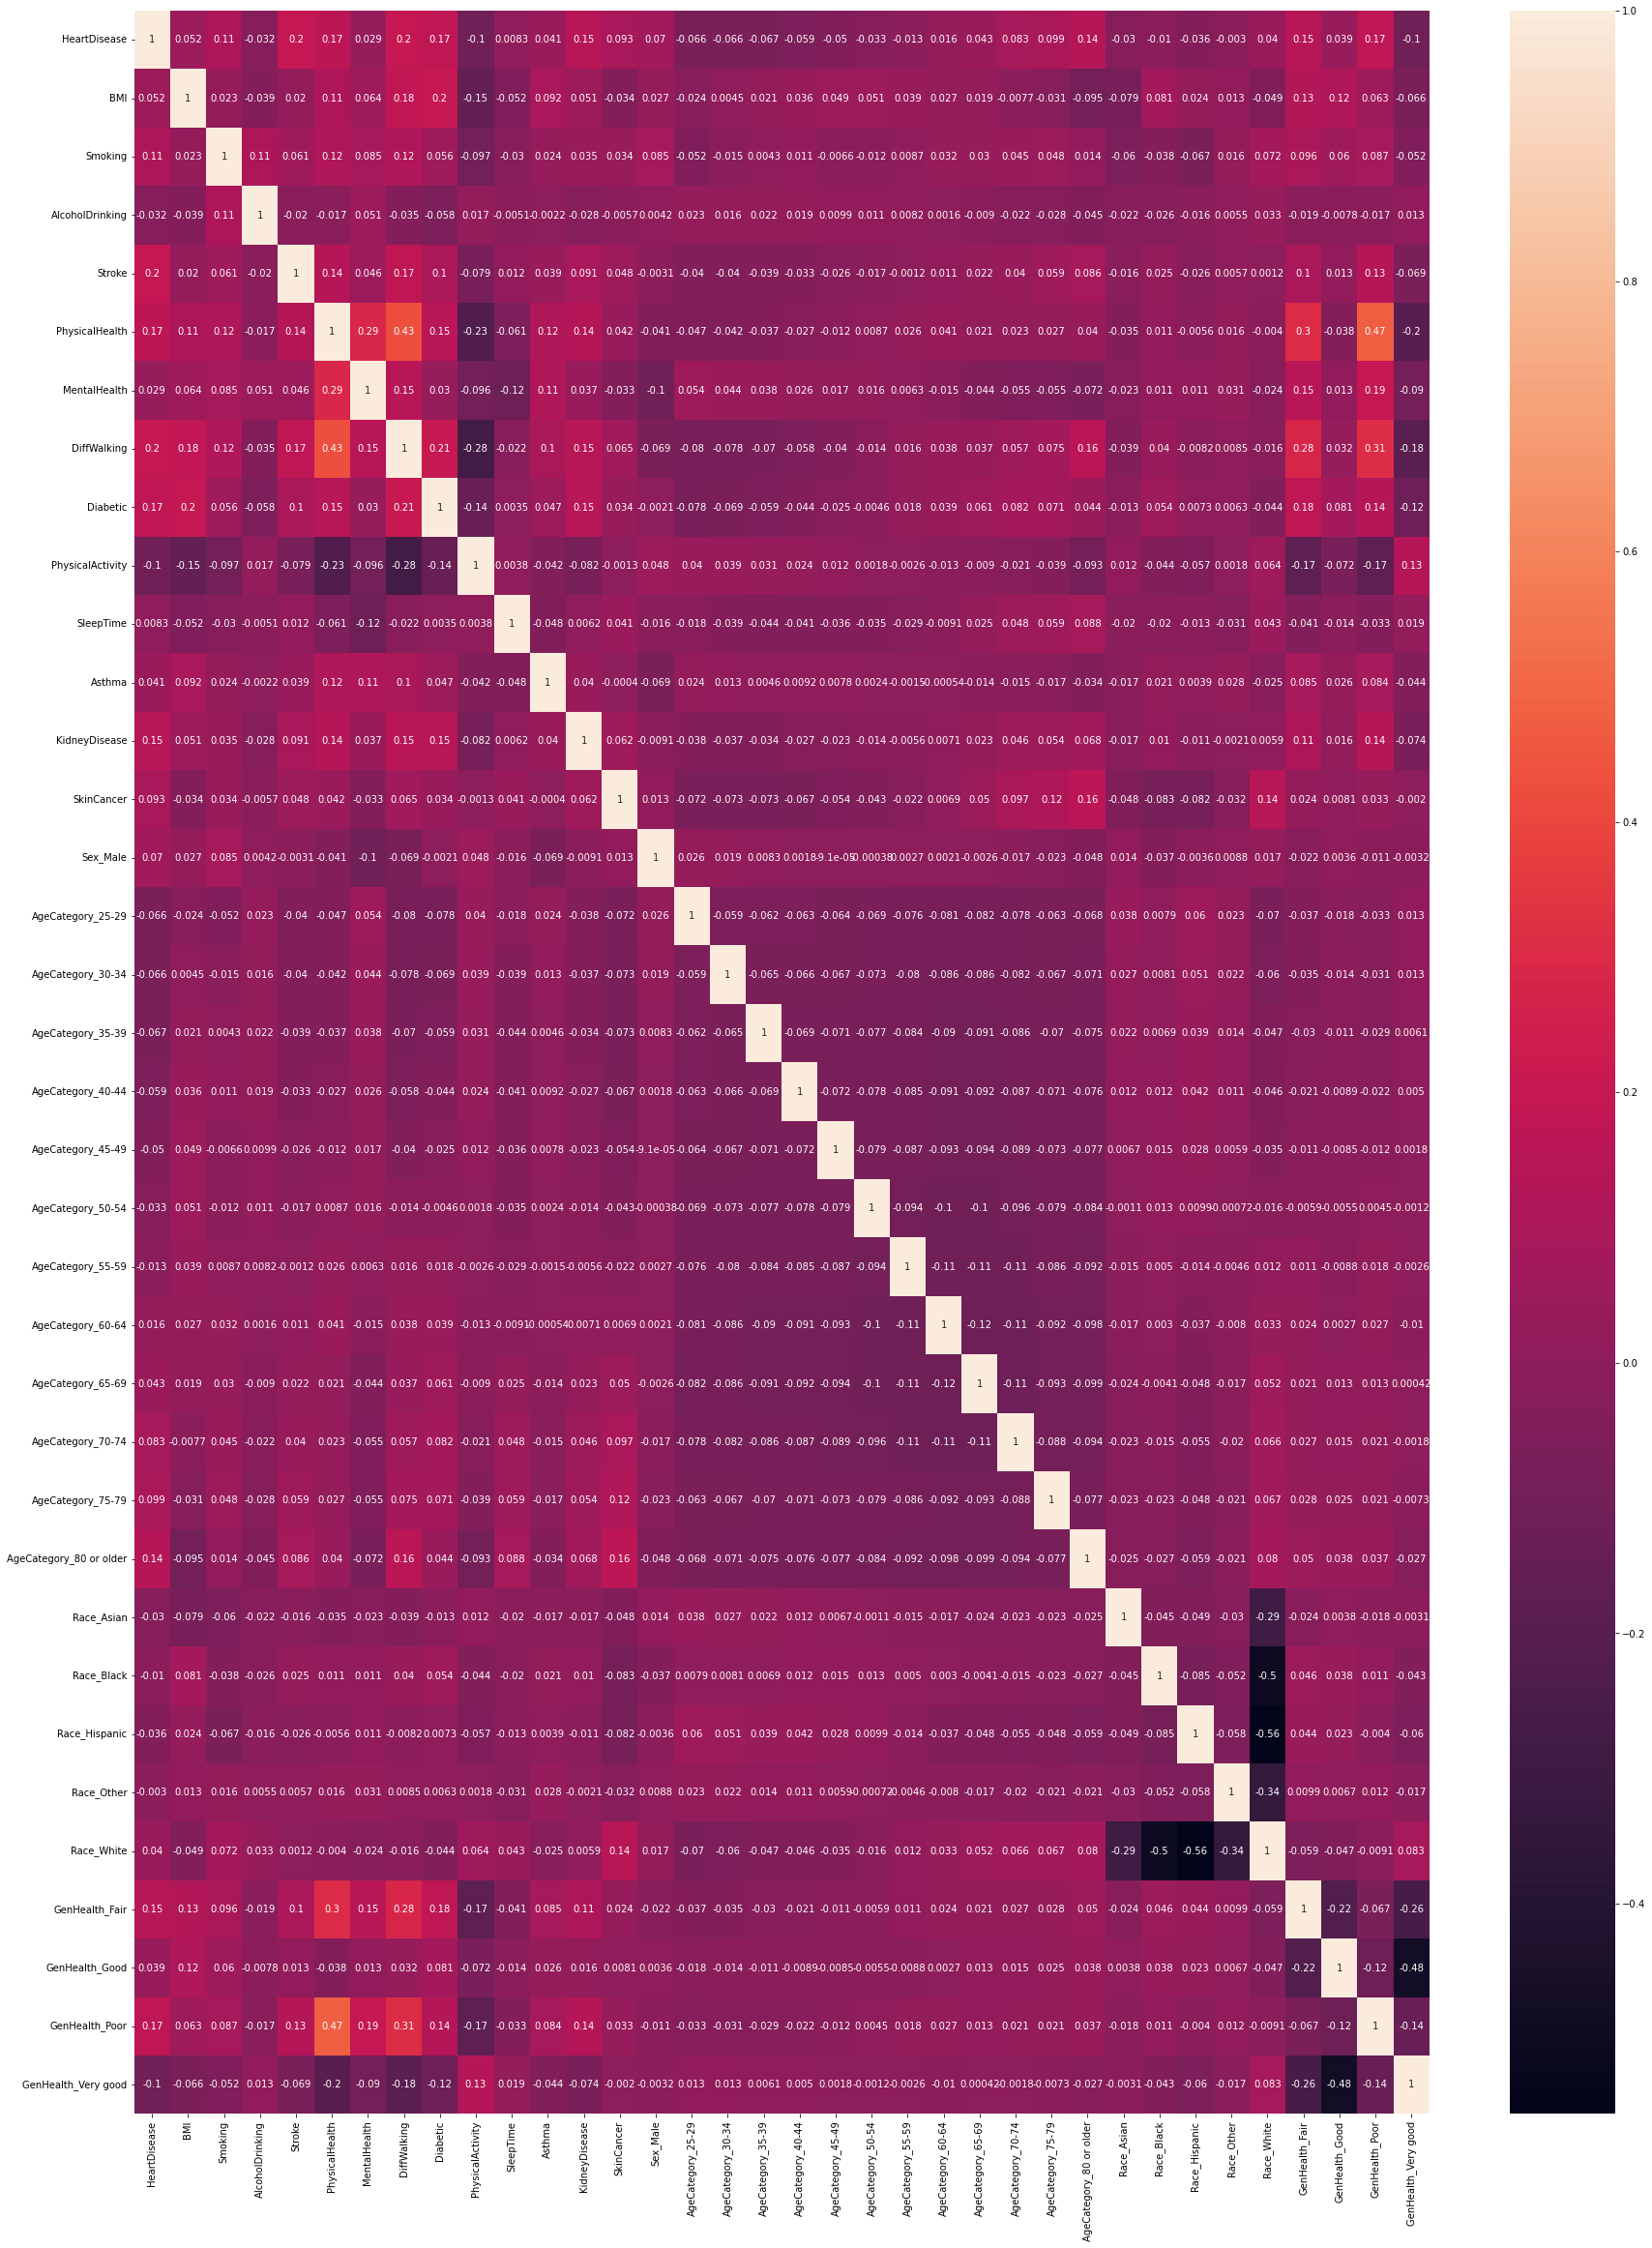

In [23]:
plt.figure(figsize = (30,40))
sns.heatmap(df.corr(),annot=True)

In [24]:
# People in the age category from 70 years to 80 or older have a higher chance of getting skin cancer.
# People with heart disease have a 10% (0.093) higher chance of getting skin cancer.
# People belonging to "White" race have 14% higher chance of getting skin cancer.

In [25]:
df['HeartDisease'].value_counts(normalize = True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

In [26]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [28]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,1,1,5.0,...,0,0,0,0,0,1,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,1,7.0,...,1,0,0,0,0,1,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,1,8.0,...,0,0,0,0,0,1,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,6.0,...,0,0,0,0,0,1,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,1,8.0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_df = scaler.fit_transform(X)

In [31]:
X_ = pd.DataFrame(data= new_df, columns= X.columns)
X_

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-1.844750,1.193474,-0.27032,-0.198040,-0.046751,3.281069,-0.401578,2.524911,0.538256,-1.460354,...,-0.285826,-0.160878,-0.27798,-0.306400,-0.188098,0.551505,-0.348745,-0.640987,-0.191292,1.344886
1,-1.256338,-0.837890,-0.27032,5.049478,-0.424070,-0.490039,-0.401578,-0.396054,0.538256,-0.067601,...,3.498626,-0.160878,-0.27798,-0.306400,-0.188098,0.551505,-0.348745,-0.640987,-0.191292,1.344886
2,-0.274603,1.193474,-0.27032,-0.198040,2.091388,3.281069,-0.401578,2.524911,0.538256,0.628776,...,-0.285826,-0.160878,-0.27798,-0.306400,-0.188098,0.551505,2.867422,-0.640987,-0.191292,-0.743558
3,-0.647473,-0.837890,-0.27032,-0.198040,-0.424070,-0.490039,-0.401578,-0.396054,-1.857852,-0.763977,...,-0.285826,-0.160878,-0.27798,-0.306400,-0.188098,0.551505,-0.348745,1.560094,-0.191292,-0.743558
4,-0.726138,-0.837890,-0.27032,-0.198040,3.097572,-0.490039,2.490174,-0.396054,0.538256,0.628776,...,-0.285826,-0.160878,-0.27798,-0.306400,-0.188098,0.551505,-0.348745,-0.640987,-0.191292,1.344886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,1.193474,-0.27032,-0.198040,0.456341,-0.490039,2.490174,2.524911,-1.857852,-0.763977,...,-0.285826,-0.160878,-0.27798,3.263708,-0.188098,-1.813222,2.867422,-0.640987,-0.191292,-0.743558
319791,0.238291,1.193474,-0.27032,-0.198040,-0.424070,-0.490039,-0.401578,-0.396054,0.538256,-1.460354,...,-0.285826,-0.160878,-0.27798,3.263708,-0.188098,-1.813222,-0.348745,-0.640987,-0.191292,1.344886
319792,-0.642753,-0.837890,-0.27032,-0.198040,-0.424070,-0.490039,-0.401578,-0.396054,0.538256,-0.763977,...,-0.285826,-0.160878,-0.27798,3.263708,-0.188098,-1.813222,-0.348745,1.560094,-0.191292,-0.743558
319793,0.705560,-0.837890,-0.27032,-0.198040,-0.424070,-0.490039,-0.401578,-0.396054,-1.857852,3.414282,...,-0.285826,-0.160878,-0.27798,3.263708,-0.188098,-1.813222,-0.348745,1.560094,-0.191292,-0.743558


In [32]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_)

In [33]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(principalComponents)

In [38]:
df = pd.DataFrame(new_data, columns=['feature1', 'feature2'])
df.head()

,feature1,feature2
0,0.889700,-1.299444
1,-0.440027,-1.826179
2,3.159973,-0.426919
3,0.186958,-1.576177
4,0.841886,-0.645331


In [39]:
df['Target'] = y

In [40]:
df.head()

,feature1,feature2,Target
0,0.889700,-1.299444,0
1,-0.440027,-1.826179,0
2,3.159973,-0.426919,0
3,0.186958,-1.576177,0
4,0.841886,-0.645331,0


In [57]:
X = df.drop('Target',axis=1)
y = df['Target']

In [60]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 255836
The number of records in the test dataset is 63959
The training dataset has 234055 records for the majority class and 21781 records for the minority class.


In [62]:
# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [63]:
# Predict the anomalies
prediction = one_class_svm.predict(X_test)

# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]

# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     58367
           1       0.26      0.03      0.06      5592

    accuracy                           0.91     63959
   macro avg       0.59      0.51      0.51     63959
weighted avg       0.86      0.91      0.87     63959



In [64]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)

# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]

# Check the prediction performance
print(classification_report(y_test, customized_prediction))

The customized score threshold for 2% of outliers is 161.82
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.23      0.05      0.08      5592

    accuracy                           0.90     63959
   macro avg       0.57      0.52      0.52     63959
weighted avg       0.86      0.90      0.87     63959



In [65]:
#The recall value increased from 3% to 5% because we increased the threshold for anomalies.

In [66]:
X_test

,feature1,feature2
271884,-0.750779,2.826243
270361,-0.665829,-0.636485
219060,-0.879365,-0.146494
24010,1.858887,-0.321605
181930,5.592507,-0.746700
...,...,...
181387,-0.398517,-2.339160
13791,1.506208,3.254481
180164,-0.858454,-0.866513
94526,-1.100412,-1.020366


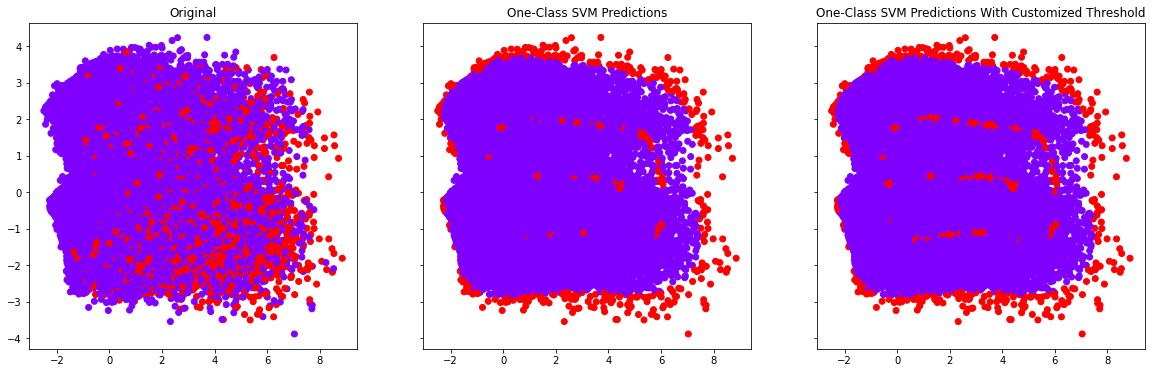

In [67]:
#Visualization

# Putting the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction

# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')

# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction'], cmap='rainbow')

# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')
